# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
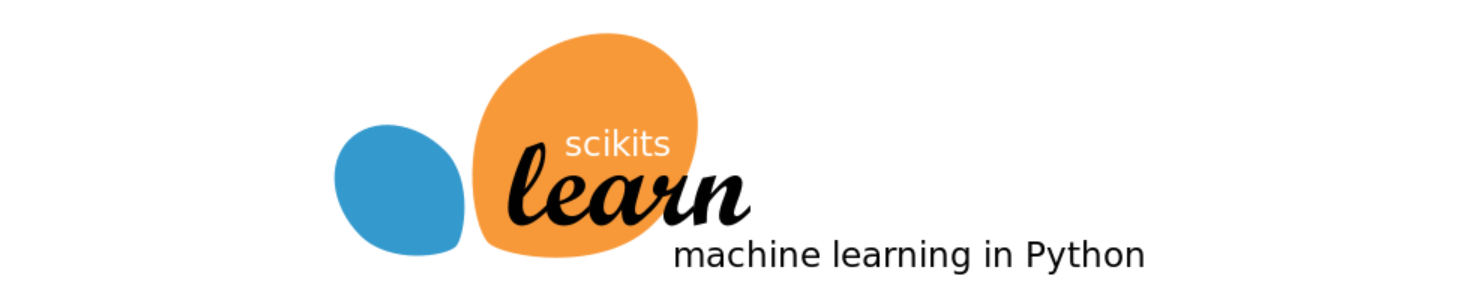

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection  import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
 

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [7]:
 reg.score(xtrain,ytrain)

0.7631247303926707

# 5. Ridge Regularization for Linear Model

In [8]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.7374064270701811

In [9]:
modelr.score(xtest, ytest)

0.634925585181308

# 6. Lasso Regularization for Linear Model

In [10]:
from sklearn.linear_model import Lasso
modell = Lasso(alpha=0.1)
modell.fit(xtrain,ytrain)
modell.score(xtrain,ytrain)

0.7517219783150315

In [11]:
modell.score(xtest, ytest)

0.6478708478773263

# 7. Polynomial Regression of degree 2

In [12]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly  = pf.fit_transform(xtrain)

xtest_poly  = pf.fit_transform(xtest)

#x_test_trans = poly.transform(x_test)


#poly = PolynomialFeatures(degree=2, include_bias=True)


In [13]:
lrp = LinearRegression()
lrp.fit(xtrain_poly,ytrain)
lrp.score(xtrain_poly,ytrain)

0.26320251874208134

In [14]:
lrp.score(xtest_poly,ytest)

0.06497868420910347

# 8. Ridge Regularization for Polynomial model

In [15]:
modelrpl =Ridge(alpha=1000)
modelrpl.fit(xtrain_poly,ytrain)
modelrpl.score(xtrain_poly,ytrain)

0.8991072584630815

In [16]:
modelrpl.score(xtest_poly,ytest)

0.848735240989745

# 9. Lasso Regularization for Polynomial model

In [17]:
modelrpl =Lasso(alpha=1)
modelrpl.fit(xtrain_poly,ytrain)
modelrpl.score(xtrain_poly,ytrain)

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+03, tolerance: 2.959e+00
  model = cd_fast.enet_coordinate_descent(


0.884216695343621

In [18]:
modelrpl.score(xtest_poly,ytest)

0.8329712025797463

# 10. Select K Best

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb=SelectKBest(score_func=f_regression,k=7)
x_selected = kb.fit_transform(xtrain,ytrain)
x_selected.shape
#x_selected.shape


(354, 7)

In [20]:
lrk = LinearRegression()
lrk.fit(x_selected,ytrain)
lrk.score(x_selected,ytrain)

0.7197545148458755

In [21]:
pf = PolynomialFeatures(degree=2)
xtrain_poly  = pf.fit_transform(xtrain)
xtest_poly  = pf.fit_transform(xtest)


In [22]:
model = LinearRegression()
model.fit(xtrain_poly, ytrain)
model.score(xtrain_poly, ytrain)

0.26320251874208134

In [23]:

traindf = pd.DataFrame(data=xtrain,columns=boston.feature_names)
tdf = pd.DataFrame(data=xtest, columns=boston.feature_names)

traindf['target']= ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  67.92080   0.0  18.10   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
1   0.07013   0.0  13.89   0.0  0.550  6.642   85.1  3.4211   5.0  276.0   
2   0.24522   0.0   9.90   0.0  0.544  5.782   71.7  4.0317   4.0  304.0   
3   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
4   0.01381  80.0   0.46   0.0  0.422  7.875   32.0  5.6484   4.0  255.0   

   PTRATIO       B  LSTAT  target  
0     20.2  384.97  22.98     5.0  
1     16.4  392.78   9.69    28.7  
2     18.4  396.90  15.94    19.8  
3     21.0  395.62   8.47    19.9  
4     14.4  394.23   2.97    50.0

In [24]:
corr =traindf.corr()

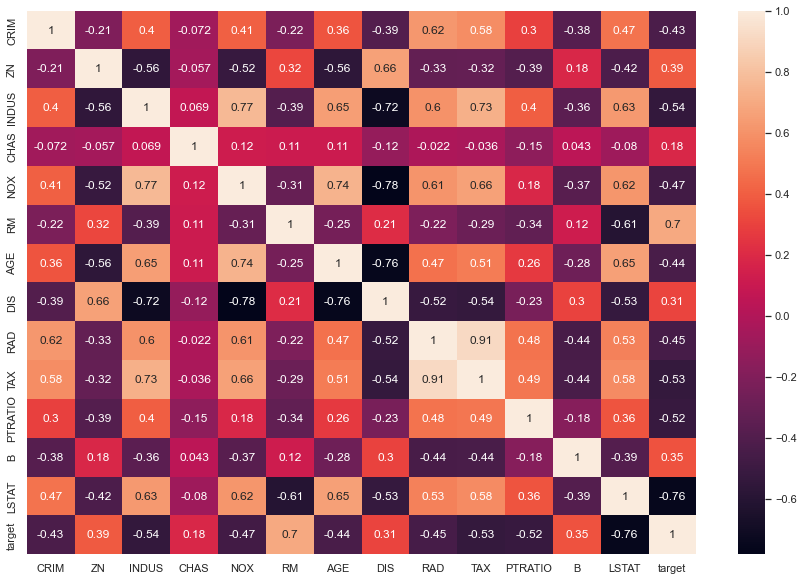

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
#visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [26]:
selected_columns=['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

In [27]:
train_selected=traindf[selected_columns]
test_selected=tdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0   0.17134  10.01  0.547  5.928  432.0     17.8  15.76
1  12.04820  18.10  0.614  5.648  666.0     20.2  14.10
2   0.46296   6.20  0.504  7.412  307.0     17.4   5.25
3   0.77299   8.14  0.538  6.495  307.0     21.0  12.80
4   0.38214   6.20  0.504  8.040  307.0     17.4   3.13

In [ ]:
kmodel=LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)

In [ ]:
kmodel.score(test_selected,ytest)

# 11. Conclusion

We use Regularization in order :
To minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.
# Regularization is use when:
### Model lack of generalization:
Model found with higher accuracy fails to generalize on unseen or new data.
#### Model instability:
Different regression models can be created with different accuracies. It becomes difficult to select one of them.

While we applying the linear regression, there is a over fitting. So in order to remove the overfitting, we used the regularization. Under the regularization, we used the ridge and lasso technique. In order to increase the accurancy, we applied the polynormal feature with degree 2. To remove futher overfitting, we applied the ridge and lasso. Since the accuracy is not much change, we performed selectkbest, to get a high acc
